In [1]:
import os

print(os.listdir('../../영화 관객수'))

['movies_test.csv', 'movies_train.csv', 'submission.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

df_train = pd.read_csv('../../영화 관객수/movies_train.csv', encoding='utf-8')
df_test = pd.read_csv('../../영화 관객수/movies_test.csv', encoding='utf-8')

df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## Feature

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# EDA

## 1. 결측치 확인

In [3]:
print('< Train >')
print(df_train.info())
print('\n','< Test >')
print(df_test.info())

< Train >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None

 < Test >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -----

[Train]
- dir_prev_bfnum 결측치 : 330개

[Test]
- dir_prev_bfnum 결측치 : 136개

### dir_prev_bfnum 변수의 분포 확인

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x244cae76700>,
 'caps': [<matplotlib.lines.Line2D at 0x244cae76d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x244cae762b0>],
 'medians': [<matplotlib.lines.Line2D at 0x244cae884c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x244cae88850>],
 'means': []}

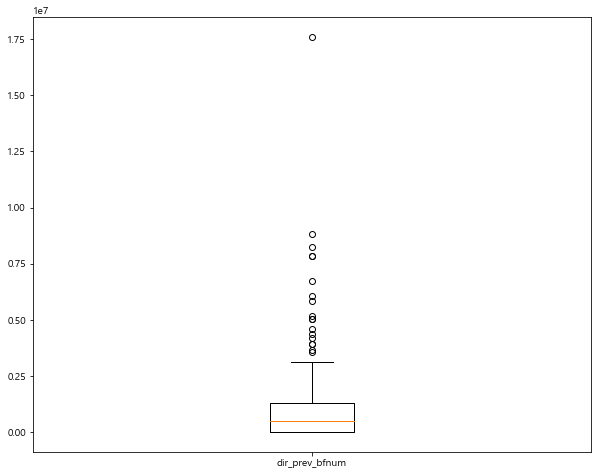

In [4]:
# 결측치는 제외
temp = df_train['dir_prev_bfnum'].dropna()

# boxplot
plt.figure(figsize=(10,8))
plt.boxplot(temp, labels=['dir_prev_bfnum'])

#### 통계량

In [5]:
# 지수표현법 끄기
pd.options.display.float_format = '{:.2f}'.format
# 다시 지수표현법으로 변환하려면
# pd.reset_option('display.float_format')

temp.describe()

count        270.00
mean     1050442.89
std      1791408.30
min            1.00
25%        20380.00
50%       478423.62
75%      1286568.62
max     17615314.00
Name: dir_prev_bfnum, dtype: float64

- min 값이 1인데 평균 관람 관객수가 1 이라는 것이 말이 안됨

-> 평균 관객수가 100명이 되지 않는 데이터 확인

In [6]:
temp2 = temp[temp < 100]
temp2

4      1.00
114   20.00
176   38.50
186   17.00
202    7.00
278   72.50
403   57.00
465    8.00
552   19.00
Name: dir_prev_bfnum, dtype: float64

In [7]:
temp_df = df_train[['dir_prev_bfnum', 'box_off_num']].dropna()
temp_df

,dir_prev_bfnum,box_off_num
1,1161602.50,7072501
2,220775.25,6959083
3,23894.00,217866
4,1.00,483387
5,837969.00,233211
...,...,...
587,67602.00,12696
588,2061296.67,1612554
592,597497.00,1472147
595,3833.00,1475091


#### dir_prev_bfnum 변수 EDA결과

- 결측치가 너무 많아서 변수를 사용하기 힘들 것 같다.

하지만, 이 변수가 목적변수(box_off_num)와 correlation이 존재한다면, 범주형 변수로 변경후 예측에 사용할 수 있을 것 같음

### 상관계수 확인

<AxesSubplot:>

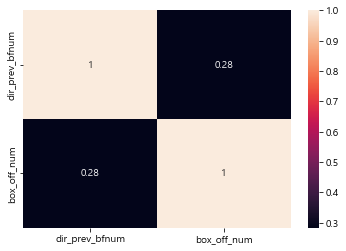

In [8]:
import seaborn as sns

sns.heatmap(temp_df.corr(), linecolor='white', annot=True)

- 상관계수가 0.28로 매우 낮은 상관관계를 보인다. 고로 dir_prev_bfnum 변수는 예측에서 제외한다

### dir_prev_bfnum 변수 제외

In [9]:
df_train = df_train.drop('dir_prev_bfnum', axis=1)
df_test = df_test.drop('dir_prev_bfnum', axis=1)

### genre별 관람객 수 시각화

In [10]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387


Text(0.5, 0, 'genre')

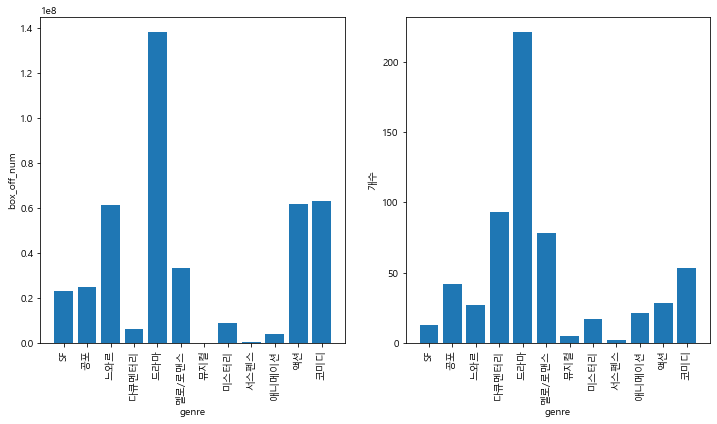

In [11]:
df_1 = df_train.groupby(['genre'])['box_off_num'].sum()
df_2 = df_train.groupby(['genre'])['box_off_num'].count()

index = np.arange(len(df_1))
genre = df_1.index

index2 = np.arange(len(df_2))
genre2 = df_2.index


fig, ax = plt.subplots(1,2,figsize=(12,6))
axx = plt.subplot(121)
axx.bar(index, df_1)
axx.set_xticks(index)
axx.set_xticklabels(genre, rotation=90)
axx.set_ylabel('box_off_num')
axx.set_xlabel('genre')

axx2 = plt.subplot(122)
axx2.bar(index2, df_2)
axx2.set_xticks(index2)
axx2.set_xticklabels(genre2, rotation=90)
axx2.set_ylabel('개수')
axx2.set_xlabel('genre')

- 드라마 장르에 특히 관객수가 많다.
- 뮤지컬, 서스펜스, 다큐멘터리 부문은 관객수가 적다

Text(0.5, 0, 'genre')

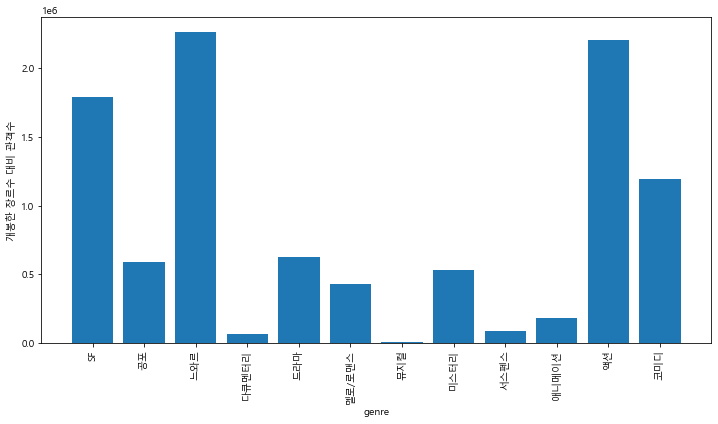

In [12]:
df_3 = df_1/df_2
df_3

index3 = np.arange(len(df_3))
genre3 = df_3.index

fig, ax = plt.subplots(1,1,figsize=(12,6))
axx = plt.subplot(111)
axx.bar(index3, df_3)
axx.set_xticks(index3)
axx.set_xticklabels(genre3, rotation=90)
axx.set_ylabel('개봉한 장르수 대비 관객수')
axx.set_xlabel('genre')

- 영화수 대비 관객의 비중으로 봤을 경우
- [다큐멘터리, 뮤지컬, 서스펜스, 애니메이션] : 상대적으로 해당 장르의 영화는 평균 관객수가 적다.
- [SF, 느와르, 액션, 코미디] : 해당 장르의 영화 평균 관객수는 상대적으로 많은 편이다.

### [idea 1]위의 장르에 가중치를 부여하는 방식을 진행하면 좋을듯

### [idea 2] 같은 월에 상영하는 동일 장르의 영화 수가 관객수에 미치는 영향 보면 좋을듯

### [idea 1 실행] 파생 변수 추가

In [13]:
def genre_weight(x):
    # 평균 관객수가 적은 영화 return -1
    if x in ['다큐멘터리', '뮤지컬', '서스펜스', '애니메이션']:
        return -1
    # 평균 관객수가 많은 영화 return 3
    elif x in ['SF', '느와르', '액션', '코미디']:
        return 3
    # 나머지 장르에 return 0
    else:
        return 0
    
df_train['genre_weight'] = df_train['genre'].apply(lambda x: genre_weight(x))

### [idea 2 실행] release_time별 box_off_num 변화 파악

In [14]:
df_train['release_time'] = pd.to_datetime(df_train['release_time'])

df_train['년'] = df_train['release_time'].dt.year
df_train['월'] = df_train['release_time'].dt.month
df_train['일'] = df_train['release_time'].dt.day
df_train['요일'] = df_train['release_time'].dt.dayofweek

In [15]:
df_3['SF']

1788345.6923076923

In [16]:
monthly_count = {i:[] for i in sorted(df_train['년'].unique())}

for i in monthly_count.keys():
    temp_df = df_train[df_train['년'] == i]
    temp = temp_df.groupby(['월', 'genre'])['title'].count()
    temp2 = temp_df.groupby(['월', 'genre'])['box_off_num'].sum()
    
    new_df = pd.concat([temp, temp2], axis=1)
    new_df['percent'] = new_df['box_off_num']/new_df['title']
    new_df['average'] = np.zeros((len(temp2)))
    
    for x,i in new_df.index:
        for j in df_3.index:
            if i == j:
                new_df['average'].loc[x,i] = df_3[j]
    
    new_df['평균대비 증감률'] = (new_df['percent'] - new_df['average'])/new_df['average'] * 100
    print(new_df[['title', '평균대비 증감률']])
#     monthly_count[i].append(new_df)
    
# monthly_count

           title  평균대비 증감률
월  genre                  
1  다큐멘터리       2     16.17
   드라마         5    -79.71
   코미디         1    -38.87
2  공포          1    -99.52
   다큐멘터리       1    -98.41
   드라마         2    -99.49
3  느와르         2    -69.63
   멜로/로맨스      2    -79.65
4  다큐멘터리       2    -75.88
   드라마         4    -24.89
   멜로/로맨스      2    -93.88
5  공포          1    283.79
   드라마         7    -93.55
   멜로/로맨스      1    -99.90
   코미디         4    -83.11
6  공포          1    -97.78
   다큐멘터리       1    -99.88
   드라마         1    377.16
7  공포          2     58.20
   다큐멘터리       1    -76.65
   드라마         4     61.76
8  공포          2    -69.81
   느와르         1    -19.73
   다큐멘터리       1    -99.64
   액션          1    180.34
9  공포          1    -99.58
   다큐멘터리       3    122.13
   드라마         5    -93.34
   멜로/로맨스      1    530.28
   액션          1    -29.85
   코미디         2    -35.28
10 공포          1    104.51
   느와르         1     20.29
   다큐멘터리       1    -98.07
   드라마         2    -99.30
 

### 특별한 상관관계를 유추할 수는 없었음

### 배포 년도별 관객수

In [17]:
df_train['년'].unique()

array([2012, 2015, 2013, 2010, 2014, 2011], dtype=int64)

[Text(1, 0, '2010'),
 Text(2, 0, '2011'),
 Text(3, 0, '2012'),
 Text(4, 0, '2013'),
 Text(5, 0, '2014'),
 Text(6, 0, '2015')]

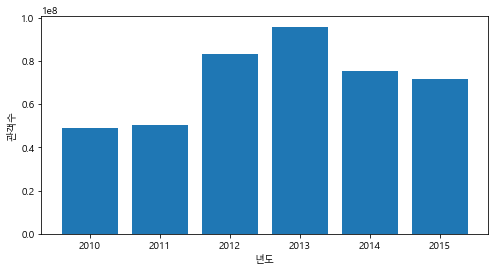

In [18]:
df_tot = df_train.drop(['release_time'], axis=1)
year = df_tot.groupby('년')['box_off_num'].sum()
index = [1,2,3,4,5,6]
real= year.index

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax1 = plt.subplot(111)
ax1.bar(index, year)
ax1.set_xlabel('년도')
ax1.set_ylabel('관객수')
ax1.set_xticks(index)
ax1.set_xticklabels(real)

### 배포 월별 관객수

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

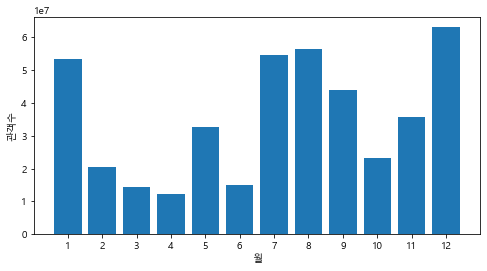

In [19]:
month = df_tot.groupby('월')['box_off_num'].sum()
real= month.index
index = np.arange(len(real))

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax1 = plt.subplot(111)
ax1.bar(index, month)
ax1.set_xlabel('월')
ax1.set_ylabel('관객수')
ax1.set_xticks(index)
ax1.set_xticklabels(real)

- 관객수가 계절의 영향을 받는가?

<AxesSubplot:xlabel='년,월'>

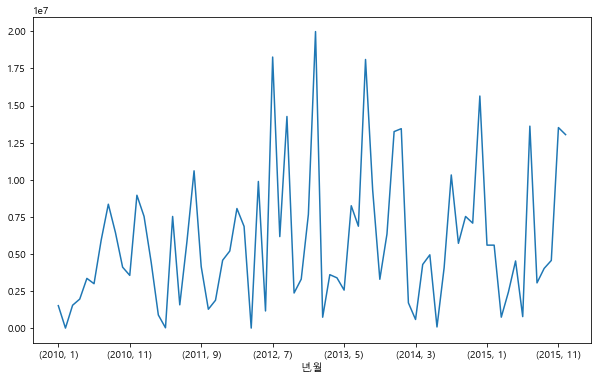

In [20]:
temp = df_tot.groupby(['년', '월'])['box_off_num'].sum()
plt.figure(figsize=(10,6))
temp.plot()

In [21]:
def season(x):
    if x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'autumn'
    elif x in [12,1,2]:
        return 'winter'
    
df_tot['season'] = df_tot['월'].apply(lambda x:season(x))
df_tot.head(2)

,title,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,genre_weight,년,월,일,요일,season
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0,91,2,23398,3,2012,11,22,3,autumn
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,2,387,3,7072501,3,2015,11,19,3,autumn


<AxesSubplot:xlabel='season'>

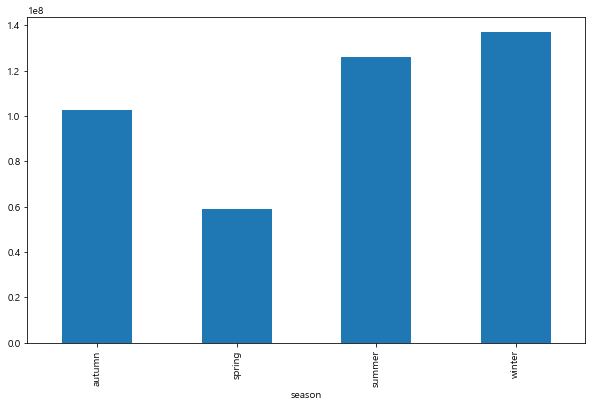

In [22]:
temp = df_tot.groupby(['season'])['box_off_num'].sum()
plt.figure(figsize=(10,6))
temp.plot.bar()

- 봄에는 비교적 적은 관객이 유치됨
--> 계절 변수를 파생변수로 사용하여 모델 학습을 진행하기로 함

### feature 간의 상관관계 분석

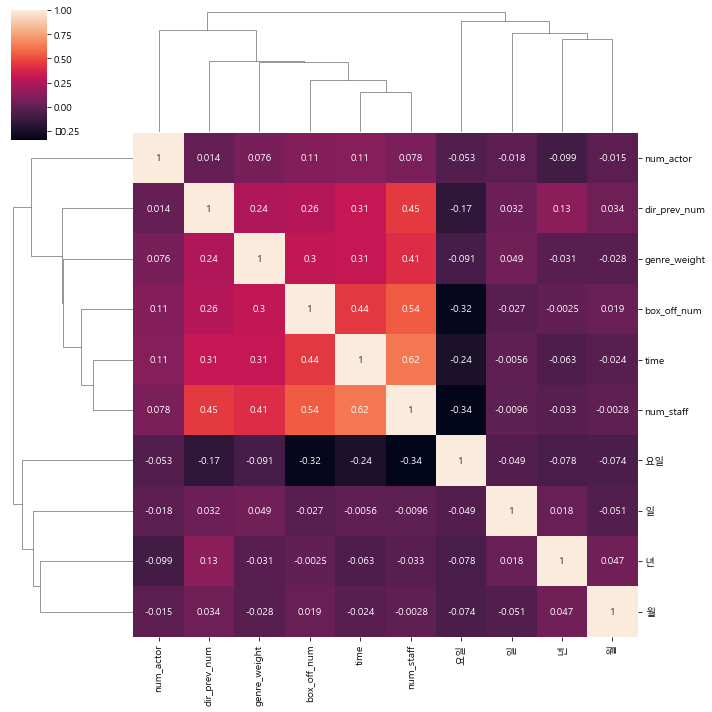

In [23]:
sns.clustermap(df_tot.corr(), annot=True)

- 관객수와의 상관관계만 보았을 때, num_staff 변수가 가장 강한 양의 상관관계를 가진다

### title 변수 제외

- title 의 경우 모든 영화가 다른 title을 가지고 있고, 이를 통한 유추가 불가능하므로 예측변수에서 제외

In [24]:
df_tot = df_tot.drop(['title'], axis=1)
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    object
 4   director       600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
 9   genre_weight   600 non-null    int64 
 10  년              600 non-null    int64 
 11  월              600 non-null    int64 
 12  일              600 non-null    int64 
 13  요일             600 non-null    int64 
 14  season         600 non-null    object
dtypes: int64(10), object(5)
memory usage: 70.4+ KB


### director 변수 파악

In [25]:
# 총 600개 영화의 제작 감독이 472명 존재한다. 
# 특정 감독의 작품이라는 점이 관객수에 영향을 미칠 수 있다고 판단.

print(len(df_tot['director'].unique()), '명')

472 명


### 상영시간의 파생변수

In [26]:
df_tot['|120-time|'] = df_tot['time'].apply(lambda x:abs(120-x))
df_tot.head(2)

,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,genre_weight,년,월,일,요일,season,|120-time|
0,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0,91,2,23398,3,2012,11,22,3,autumn,24
1,(주)쇼박스,느와르,130,청소년 관람불가,우민호,2,387,3,7072501,3,2015,11,19,3,autumn,10


### 범주형 변수들 label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for i in ['distributor', 'genre', 'screening_rat', 'director', 'season']:
    enc.fit(df_tot[i])
    df_tot[i] = enc.transform(df_tot[i])
    print('<', i, '>')
    print(enc.classes_, ' -> ', np.arange(len(enc.classes_)), '\n')
    
df_tot.head()

< distributor >
['(주) 브릿지웍스' '(주) 액티버스엔터테인먼트' '(주) 영화사조제' '(주) 영화제작전원사' '(주) 케이알씨지'
 '(주)JK필름' '(주)NEW' '(주)고앤고 필름' '(주)노버스엔터테인먼트' '(주)대명문화공장' '(주)더픽쳐스'
 '(주)두타연' '(주)드림팩트엔터테인먼트' '(주)랠리버튼' '(주)레인보우 팩토리' '(주)로드하우스' '(주)리틀빅픽처스'
 '(주)마운틴픽쳐스' '(주)마인스 엔터테인먼트' '(주)마인스엔터테인먼트' '(주)미디어데이' '(주)쇼박스'
 '(주)스마일이엔티' '(주)스톰픽쳐스코리아' '(주)시네마달' '(주)씨엠닉스' '(주)아우라픽처스' '(주)아이필름코퍼레이션'
 '(주)에이원 엔터테인먼트' '(주)엣나인필름' '(주)예지림 엔터테인먼트' '(주)온비즈넷' '(주)유비네트워크'
 '(주)유비콘텐츠' '(주)이스트스카이필름' '(주)콘텐츠 윙' '(주)키노아이' '(주)팝 파트너스' '(주)팝엔터테인먼트'
 '(주)패뷸러스' '(주)패스파인더씨앤씨' '(주)프레인글로벌' '(주)피터팬픽쳐스' '(주)휘엔터테인먼트'
 'BoXoo 엔터테인먼트' 'CGV 무비꼴라쥬' 'CGV 아트하우스' 'CGV아트하우스' 'CJ CGV'
 'CJ E&M Pictures' 'CJ E&M 영화부문' 'CJ 엔터테인먼트' 'KBS미디어(주)' 'KT' 'KT&G 상상마당'
 'M2픽처스' 'NEW' 'OAL(올)' 'SBS콘텐츠허브' 'SK텔레콤(주)' 'SK플래닛' 'THE 픽쳐스' 'tvN'
 'ysfilm' '건시네마' '고구마공작소' '골든타이드픽처스' '김기덕 필름' '나우콘텐츠' '나이너스엔터테인먼트(주)'
 '노바엔터테인먼트' '더 피플' '더픽쳐스/(주)마운틴픽쳐스' '동국대학교 충무로영상제작센터' '두 엔터테인먼트' '드림로드'
 '드림팩트 엔터테인먼트' '디 씨드' '디마엔터테인먼트' '롤러코스터 프로덕션' '롯데엔터테인먼트' '리틀빅픽처스' '리틀빅픽쳐스'
 '마노엔터테인먼트' '마법

,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,genre_weight,년,월,일,요일,season,|120-time|
0,80,10,96,3,393,0,91,2,23398,3,2012,11,22,3,0,24
1,21,2,130,3,252,2,387,3,7072501,3,2015,11,19,3,0,10
2,21,10,123,1,357,4,343,4,6959083,3,2013,6,5,2,2,3
3,6,11,101,2,17,2,20,6,217866,3,2012,7,12,3,2,19
4,96,11,108,1,218,1,251,2,483387,3,2010,11,4,3,0,12


# 모델링

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [29]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
train_x = df_tot.drop(['box_off_num'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(train_x, df_tot['box_off_num'], test_size=0.33, random_state=16)
x_train

,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,genre_weight,년,월,일,요일,season,|120-time|
485,21,2,111,1,73,2,343,2,3,2014,5,29,3,1,9
423,66,1,99,3,437,2,74,3,0,2014,1,23,3,3,21
112,21,2,133,3,265,1,308,2,3,2012,2,2,3,3,13
217,139,1,96,3,25,1,156,4,0,2015,9,10,3,0,24
70,17,5,97,3,413,1,59,4,0,2013,5,16,3,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,6,1,106,1,198,1,61,3,0,2011,7,7,3,2,14
321,16,9,88,2,43,0,5,6,-1,2015,10,8,3,0,32
581,138,11,74,3,66,1,29,4,3,2015,9,10,3,0,46
121,17,4,81,3,56,1,34,5,0,2013,9,5,3,0,39


In [33]:
from sklearn.metrics import mean_squared_error
# RMSE = mean_squared_error(y_train, y_pred)**0.5


model1 = RandomForestRegressor(criterion='mean_absolute_error', random_state=1)

param1 = {'max_depth':[7, 10, 13],
          'min_samples_leaf':[1, 2, 3]}

grid1 = GridSearchCV(model1, param1, scoring=mean_squared_error, cv=3)
grid1.fit(x_train, y_train.values)

NotFittedError: All estimators failed to fit

In [ ]:
# RF Regressor
import random
import numpy

random.seed(16)
np.random.seed(16)

print('Best Params : ', grid1.best_params_)
print('Best Score : ', grid1.best_score_)

best_grid1 = grid1.best_estimator_
train_pred = best_grid1.predict(x_train)
val_pred = best_grid1.predict(x_val)

fig, ax = plt.subplots(2,1, figsize=(12,12))

ax1 = plt.subplot(2,1,1)
ax1.plot(y_train.values, color='blue',label='True')
ax1.plot(train_pred, color='red', label='Predict')
ax1.legend(loc='upper right')

ax2 = plt.subplot(2,1,2)
ax2.plot(y_val.values, color='blue',label='True')
ax2.plot(val_pred, color='red', label='Predict', alpha=0.5)
ax2.legend(loc='upper right')

print('< train >')
print('MAPE: ', mean_absolute_percentage_error(y_train.values, train_pred))
print('MAE: ', mean_absolute_error(y_train.values, train_pred))

print('< validation >')
print('MAPE: ', mean_absolute_percentage_error(y_val.values, val_pred))
print('MAE: ', mean_absolute_error(y_val.values, val_pred))

- 5,000,000 이상의 관객을 이상치라고 판단하였을때, 해당 이상치를 모델이 잘 에측하지 못하는 현상을 보인다.
- 5,000,000 이상 관객의 영화 vs 5,000,000 미만 관객의 영화의 특징적 차이를 찾아야 함

In [ ]:
temp1 = df_tot[df_tot['box_off_num']>=5000000]
temp2 = df_tot[df_tot['box_off_num']<5000000]


temp1.describe()

In [ ]:
temp2.describe()

많은 관객을 유치한 영화(500만 관객 이상)의 경우
1. 상영시간이 약 120분에 가깝다 (-> 상영시간이 120분에서 얼마나 차이나는지 변수 추가하면 좋을듯)
2. 촬영스탭의 수가 많다
3. 관객들이 선호하는 장르의 영화이다(genre weight의 평균이 높음)  

과 같은 특징을 가지고 있다.

In [ ]:
temp3 = df_tot[df_tot['box_off_num']<5000]
temp3.describe()

- 놀랍게도 관객수 5000 미만의 상영작이 254개나 존재함...

### Feature importance 파악

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(x_train.columns, best_grid1.feature_importances_)

- 파생변수를 새로 생성하면서, 예측에 의미가 중복되는 변수가 많아져서, 오히려 모델의 학습에 악영향을 줬을 수 있다고 생각
- 이를 해결하기 위해 PCA 적용

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(train_x)
train_x = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2', 'pc3'])

pca.explained_variance_ratio_
# n = 15 일 때
# array([5.69100811e-01, 3.77744978e-01, 4.38047560e-02, 6.09008999e-03,
#        1.56209006e-03, 1.01602434e-03, 2.37716057e-04, 1.73655884e-04,
#        1.16001309e-04, 6.01454917e-05, 2.67726674e-05, 2.39787653e-05,
#        2.19308052e-05, 1.73670866e-05, 3.68230963e-06])
# 3개의 pc로 데이터의 99% 이상의 설명력을 지님 -> pc 3개만을 사용하는 것으로 결정

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_x, df_tot['box_off_num'], test_size=0.33, random_state=16)
x_train

In [ ]:
model1 = RandomForestRegressor(criterion='mae', random_state=1)

param1 = {'max_depth':[7, 10, 13],
          'min_samples_leaf':[1, 2, 3]}

grid1 = GridSearchCV(model1, param1, scoring=mean_absolute_error, cv=3)
grid1.fit(x_train, y_train.values)

In [ ]:
# RF Regressor
import random
import numpy

random.seed(16)
np.random.seed(16)

print('Best Params : ', grid1.best_params_)
print('Best Score : ', grid1.best_score_)

best_grid1 = grid1.best_estimator_
train_pred = best_grid1.predict(x_train)
val_pred = best_grid1.predict(x_val)

fig, ax = plt.subplots(2,1, figsize=(12,12))

ax1 = plt.subplot(2,1,1)
ax1.plot(y_train.values, color='blue',label='True')
ax1.plot(train_pred, color='red', label='Predict')
ax1.legend(loc='upper right')

ax2 = plt.subplot(2,1,2)
ax2.plot(y_val.values, color='blue',label='True')
ax2.plot(val_pred, color='red', label='Predict', alpha=0.5)
ax2.legend(loc='upper right')

print('< train >')
print('MAPE: ', mean_absolute_percentage_error(y_train.values, train_pred))
print('MAE: ', mean_absolute_error(y_train.values, train_pred))

print('< validation >')
print('MAPE: ', mean_absolute_percentage_error(y_val.values, val_pred))
print('MAE: ', mean_absolute_error(y_val.values, val_pred))

### 각 변수의 단위 차이에서 오는 가중치 문제일 수 있다고 생각
### -> 정규화 & 표준화를 통해 해결해 보기

### PCA, 리더보드 몇등?